<a href="https://colab.research.google.com/github/mksnew111/Mobile-Price-Range-Prediction/blob/main/classification_Sample_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Mobile Price Range Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**

Nowadays, almost everyone needs a cellphone. It's a really fast-changing product in the tech world. New phones with cool features come out all the time, and lots of people buy them every day. In this fast-moving market, phone companies have to set the right prices to compete with each other. Predicting phone prices helps companies figure out how to price their phones competitively. It also helps people make sure they're getting a good deal when they buy a phone.







# **GitHub Link -**

https://github.com/mksnew111/Mobile-Price-Range-Prediction/blob/main/classification_Sample_ML_Submission_Template.ipynb

# **Problem Statement**


In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msn  # visualize missing values in dataset

from scipy import stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV


### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


### Dataset First View

In [3]:
# Dataset First Look
mobile_df = pd.read_csv("/content/drive/MyDrive/Dataset/data_mobile_price_range.csv")
mobile_df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [4]:
# Last five rows
mobile_df.tail()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[5 rows x 21 columns]

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
mobile_df.shape

(2000, 21)

### Dataset Information

In [6]:
# Dataset Info
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
len(mobile_df[mobile_df.duplicated()])

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
mobile_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<Axes: >

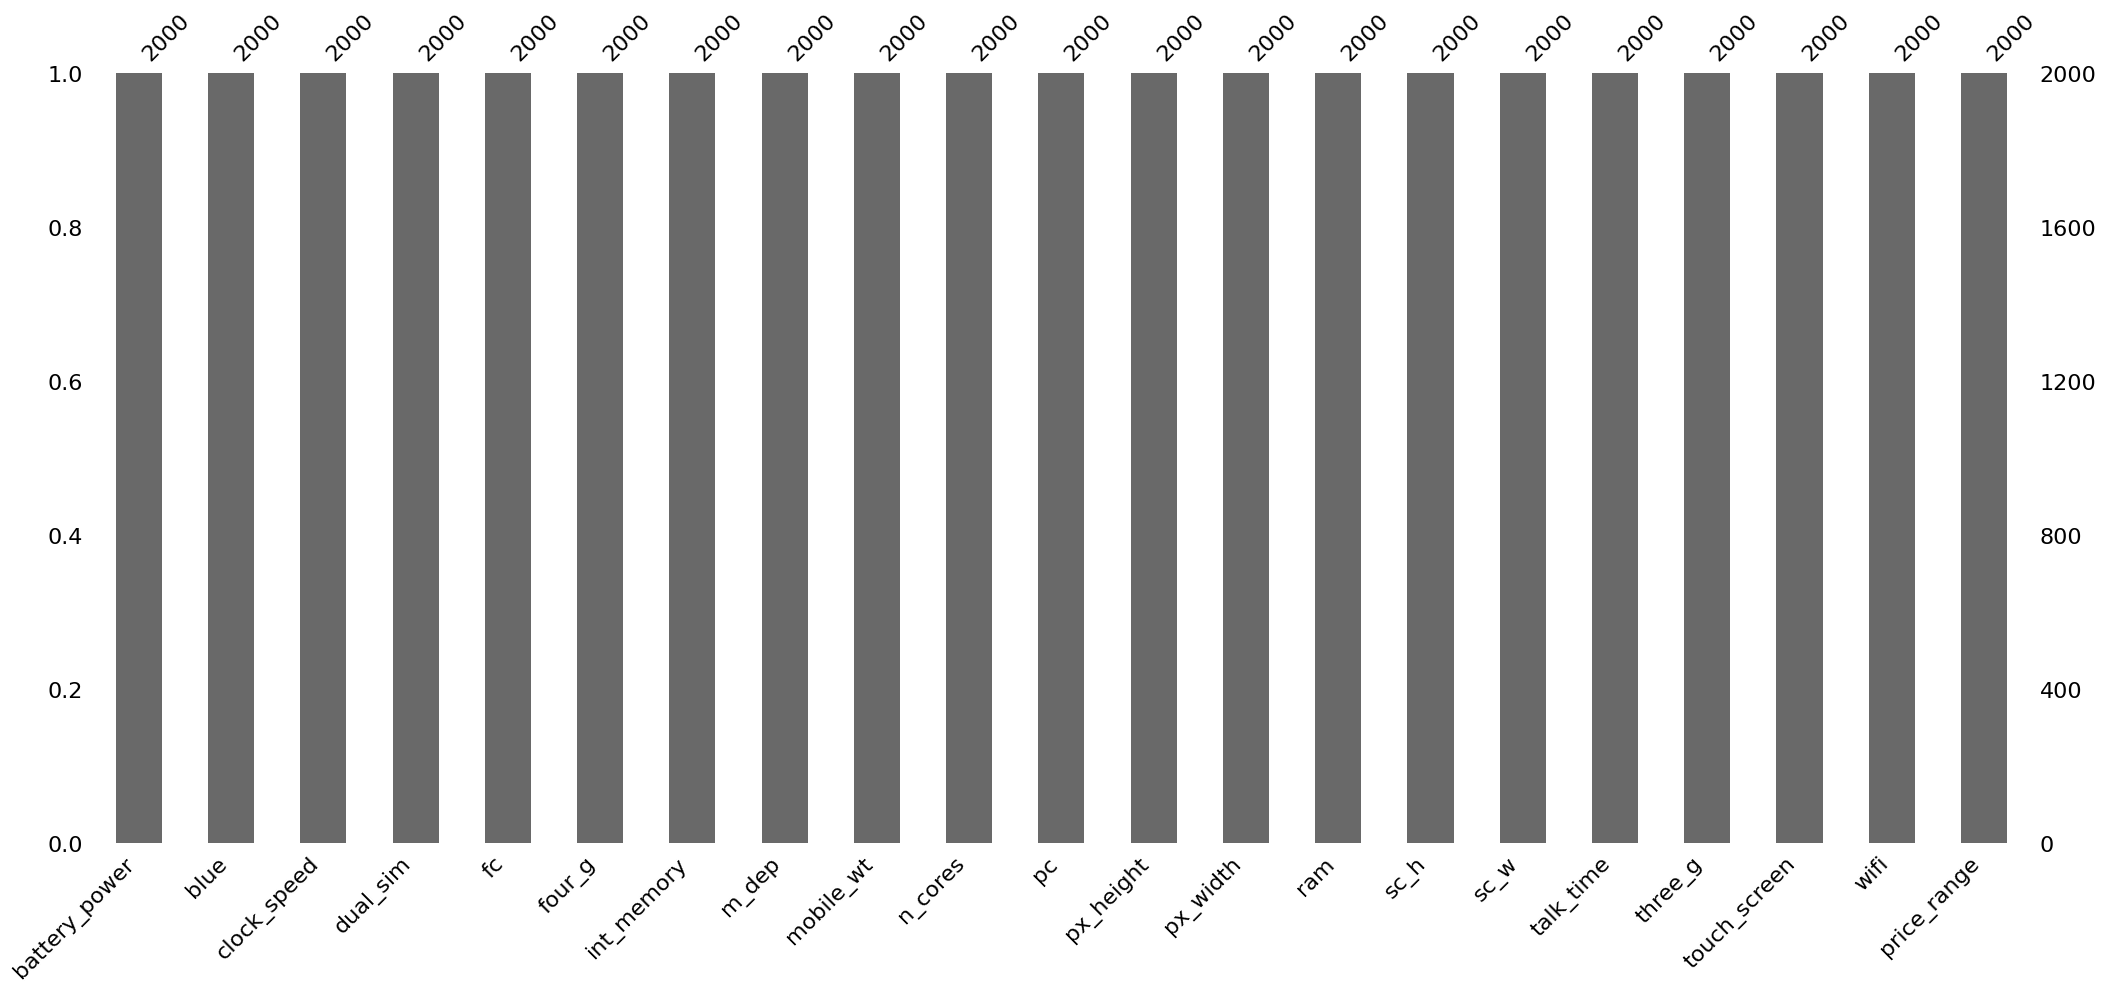

In [9]:
# Visualizing the missing values
msn.bar(mobile_df)

### What did you know about your dataset?



* Our dataset have 2000 observations and 21 features.
* The datasets contain no duplicate values.
* There are no null values present in the dataset.




## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
mobile_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [11]:
# Dataset Describe
mobile_df.describe().T    # Basic statical details

count        mean          std    min      25%     50%  \
battery_power  2000.0  1238.51850   439.418206  501.0   851.75  1226.0   
blue           2000.0     0.49500     0.500100    0.0     0.00     0.0   
clock_speed    2000.0     1.52225     0.816004    0.5     0.70     1.5   
dual_sim       2000.0     0.50950     0.500035    0.0     0.00     1.0   
fc             2000.0     4.30950     4.341444    0.0     1.00     3.0   
four_g         2000.0     0.52150     0.499662    0.0     0.00     1.0   
int_memory     2000.0    32.04650    18.145715    2.0    16.00    32.0   
m_dep          2000.0     0.50175     0.288416    0.1     0.20     0.5   
mobile_wt      2000.0   140.24900    35.399655   80.0   109.00   141.0   
n_cores        2000.0     4.52050     2.287837    1.0     3.00     4.0   
pc             2000.0     9.91650     6.064315    0.0     5.00    10.0   
px_height      2000.0   645.10800   443.780811    0.0   282.75   564.0   
px_width       2000.0  1251.51550   432.199447  500.0   874.75  1247.0   
ram            2000.0  2124.21300  1084.732044  256.0  1207.50  2146.5   
sc_h           2000.0    12.30650     4.213245    5.0     9.00    12.0   
sc_w           2000.0     5.76700     4.356398    0.0     2.00     5.0   
talk_time      2000.0    11.01100     5.463955    2.0     6.00    11.0   
three_g        2000.0     0.76150     0.426273    0.0     1.00     1.0   
touch_screen   2000.0     0.50300     0.500116    0.0     0.00     1.0   
wifi           2000.0     0.50700     0.500076    0.0     0.00     1.0   
price_range    2000.0     1.50000     1.118314    0.0     0.75     1.5   

                   75%     max  
battery_power  1615.25  1998.0  
blue              1.00     1.0  
clock_speed       2.20     3.0  
dual_sim          1.00     1.0  
fc                7.00    19.0  
four_g            1.00     1.0  
int_memory       48.00    64.0  
m_dep             0.80     1.0  
mobile_wt       170.00   200.0  
n_cores           7.00     8.0  
pc               15.00    20.0  
px_height       947.25  1960.0  
px_width       1633.00  1998.0  
ram            3064.50  3998.0  
sc_h             16.00    19.0  
sc_w              9.00    18.0  
talk_time        16.00    20.0  
three_g           1.00     1.0  
touch_screen      1.00     1.0  
wifi              1.00     1.0  
price_range       2.25     3.0

### Variables Description

* Battery_power :- Total energy a battery can store in one time measured in mAh

* Blue :- Has bluetooth or not

* Clock_speed :- speed at which microprocessor executes instructions

* Dual_sim :- Has dual sim support or not

* Fc :- Front Camera mega pixels

* Four_g :- Has 4G or not

* Int_memory :- Internal Memory in Gigabytes

* m_dep :- Mobile Depth in cm

* Mobile_wt :- Weight of mobile phone

* N_cores :- Number of cores of processor

* Pc :- Primary Camera mega pixels

* Px_height :- Pixel Resolution Height

* Px_width :- Pixel Resolution Width

* Ram :- Random Access Memory in Mega

* Sc_h :- Screen Height of mobile in cm

* Sc_w :- Screen Width of mobile in cm

* Talk_time :- longest time that a single battery charge will last when you are

* Three_g :- Has 3G or not

* Touch_screen :- Has touch screen or not

* Wifi :- Has wifi or not

* Price_range :- This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for i in mobile_df.columns:
  unique_value = mobile_df[i].unique()
  print(f"Unique value for {i}: {unique_value}")
  print("_"*100)

Unique value for battery_power: [ 842 1021  563 ... 1139 1467  858]
____________________________________________________________________________________________________
Unique value for blue: [0 1]
____________________________________________________________________________________________________
Unique value for clock_speed: [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
____________________________________________________________________________________________________
Unique value for dual_sim: [0 1]
____________________________________________________________________________________________________
Unique value for fc: [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
____________________________________________________________________________________________________
Unique value for four_g: [0 1]
____________________________________________________________________________________________________
Unique value 

## 3. ***Data Wrangling***

### Data Wrangling Code

From the Describe method I observed that px_height (pixel Resolution height) and sc_w (screen width) columns have minimum value 0 which is not possible for any mobile.

In [13]:
# Write your code to make your dataset analysis ready.
print("Zero values in pixel Resolution height:",len(mobile_df[mobile_df['px_height']==0]))
print("Zero values in pixel screen width:",len(mobile_df[mobile_df['sc_w']==0]))

Zero values in pixel Resolution height: 2
Zero values in pixel screen width: 180


In [14]:
# replacing the zero value with mean value
mobile_df['px_height'].replace(to_replace=0, value= int(mobile_df.px_height.mean()), inplace=True)
mobile_df['sc_w'].replace(to_replace = 0, value= int(mobile_df.sc_w.mean()), inplace = True)

In [15]:
# List of numeric and categorical columns
numeric_column = []
categorical_column = []
for col in mobile_df.columns:
  if mobile_df[col].nunique() > 4:
    numeric_column.append(col)
  else:
    categorical_column.append(col)
print('Numeric columns: ',numeric_column)   # Numeric columns
print('Categorical columns: ',categorical_column)   # categorical columns

Numeric columns:  ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
Categorical columns:  ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']


In [16]:
# Data in numeric columns
mobile_df[numeric_column]

battery_power  clock_speed  fc  int_memory  m_dep  mobile_wt  n_cores  \
0               842          2.2   1           7    0.6        188        2   
1              1021          0.5   0          53    0.7        136        3   
2               563          0.5   2          41    0.9        145        5   
3               615          2.5   0          10    0.8        131        6   
4              1821          1.2  13          44    0.6        141        2   
...             ...          ...  ..         ...    ...        ...      ...   
1995            794          0.5   0           2    0.8        106        6   
1996           1965          2.6   0          39    0.2        187        4   
1997           1911          0.9   1          36    0.7        108        8   
1998           1512          0.9   4          46    0.1        145        5   
1999            510          2.0   5          45    0.9        168        6   

      pc  px_height  px_width   ram  sc_h  sc_w  talk_time  
0      2         20       756  2549     9     7         19  
1      6        905      1988  2631    17     3          7  
2      6       1263      1716  2603    11     2          9  
3      9       1216      1786  2769    16     8         11  
4     14       1208      1212  1411     8     2         15  
...   ..        ...       ...   ...   ...   ...        ...  
1995  14       1222      1890   668    13     4         19  
1996   3        915      1965  2032    11    10         16  
1997   3        868      1632  3057     9     1          5  
1998   5        336       670   869    18    10         19  
1999  16        483       754  3919    19     4          2  

[2000 rows x 14 columns]

In [17]:
# Data in Categorical columns
mobile_df[categorical_column]

blue  dual_sim  four_g  three_g  touch_screen  wifi  price_range
0        0         0       0        0             0     1            1
1        1         1       1        1             1     0            2
2        1         1       1        1             1     0            2
3        1         0       0        1             0     0            2
4        1         0       1        1             1     0            1
...    ...       ...     ...      ...           ...   ...          ...
1995     1         1       1        1             1     0            0
1996     1         1       0        1             1     1            2
1997     0         1       1        1             1     0            3
1998     0         0       1        1             1     1            0
1999     1         1       1        1             1     1            3

[2000 rows x 7 columns]

### What all manipulations have you done and insights you found?



*   Some pixel height and screen width values are zero, which doesn't make any sense. Therefore, I replaced those zeros with the mean value.
*  We create two groups numerical_column and categorical_column. columns having unique values greater then 4 are considered as numerical columns and columns having unique values less then 4 were considered as categorical columns.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
### Relation between battery power with price range.

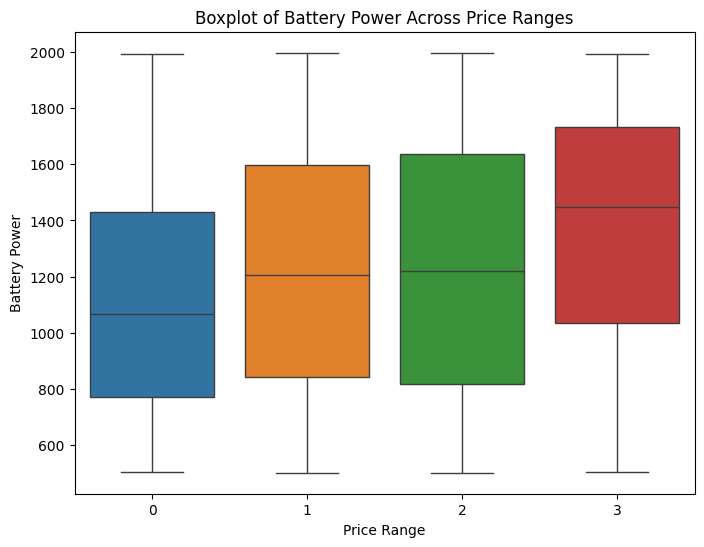

In [18]:
# Chart - 1 visualization code
#chart size
plt.figure(figsize=(8,6))

# creating box plot for visualizing battery power among different price range
ax = sns.boxplot(x="price_range", y="battery_power", data=mobile_df, hue='price_range', legend=False, palette='tab10')

# Add title and labels
ax.set_title("Boxplot of Battery Power Across Price Ranges")
ax.set_xlabel("Price Range")
ax.set_ylabel("Battery Power")

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

Box plots provide a clear comparison of the distribution of battery power across different price ranges.Each box represents the interquartile range (IQR) of the battery power within a specific price range, making it easy to compare the central tendency and spread of battery power among different price groups.

##### 2. What is/are the insight(s) found from the chart?

This chart illustrates a direct relationship between battery power and price range, indicating that as battery power increases, so does the price range.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights may help creating a positive business impact.

#### Chart - 2
### comparision of internal-memory with price range.

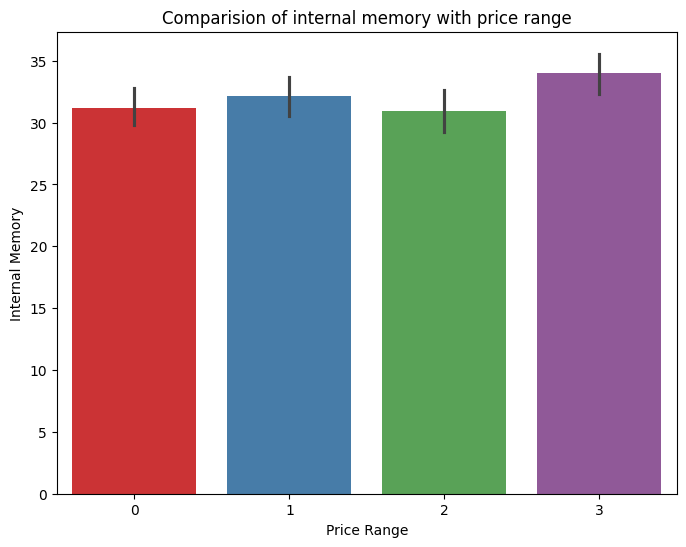

In [19]:
# Chart - 2 visualization code
# chart size
plt.figure(figsize=(8,6))

# Creating bar chart
sns.barplot(x='price_range', y='int_memory', data = mobile_df, hue = 'price_range', legend=False, palette='Set1')

# Setting title and labels
plt.title("Comparision of internal memory with price range")
plt.xlabel("Price Range")
plt.ylabel("Internal Memory")

# Showing the Chart
plt.show()

##### 1. Why did you pick the specific chart?

Bar plots allow for clear visual comparison of the values of different  groups. The length of each bar represents the value of the that groups.

##### 2. What is/are the insight(s) found from the chart?

The internal memory remains nearly consistent across all price ranges except the highest price range mobile.






#### Chart - 3
### Relation between screen height, screen width and price range.

Correlation between Screen Height, Screen Width, and Price Range:
                 sc_h      sc_w  price_range
sc_h         1.000000  0.505464     0.022986
sc_w         0.505464  1.000000     0.032826
price_range  0.022986  0.032826     1.000000


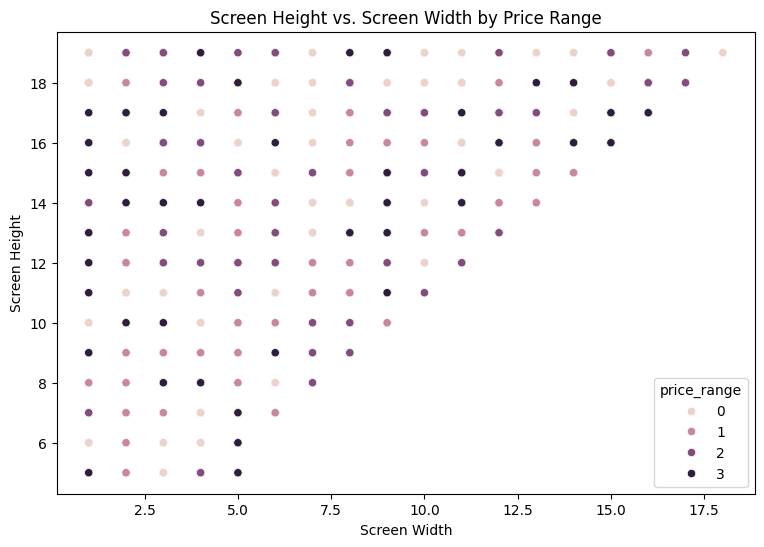

In [23]:
# Chart - 3 visualization code

# Correlation between screen height, screen width and price range
corr_sc = mobile_df[['sc_h', 'sc_w', 'price_range']].corr()
print('Correlation between Screen Height, Screen Width, and Price Range:')
print(corr_sc)

# Scatter plot of screen height and screen width with price range
plt.figure(figsize=(9, 6))
# Scatter plot
sns.scatterplot(data=mobile_df, x='sc_w', y='sc_h', hue='price_range')
# Title and labels  of plot
plt.xlabel('Screen Width')
plt.ylabel('Screen Height')
plt.title('Screen Height vs. Screen Width by Price Range')
plt.show()


##### 1. Why did you pick the specific chart?

Scatter plot is a type of graph that uses dots to represent values for two different numeric variables. It is useful for showing the relationship between the variables, such as whether they are correlated, how strong the correlation is, and what kind of pattern or trend they follow.

##### 2. What is/are the insight(s) found from the chart?



*   Screen height and Screen width are positive correlated.
*   correlation of screen height and screen width with price range is very weak.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The correlation analysis suggests that there is no significant relationship between screen height, screen width, and the price range of mobile phones.

#### Chart - 4
### Mobile weight vs price range

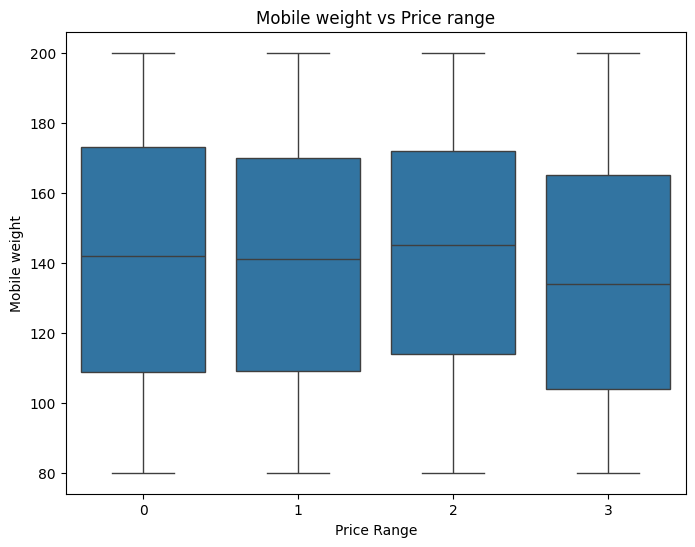

In [24]:
# Chart - 4 visualization code

# Graph size
plt.figure(figsize=(8,6))
# Horizontal bar plot
sns.boxplot(data=mobile_df, x='price_range', y='mobile_wt')
# Title and labels
plt.title("Mobile weight vs Price range")
plt.xlabel("Price Range")
plt.ylabel("Mobile weight")
plt.show()

##### 1. Why did you pick the specific chart?

Box plots provide a clear visualization of how data is distributed along a numerical axis. You can quickly see if the data is symmetric or skewed, and whether it has any outliers. The line inside the box represents the median, which is a measure of the central tendency. We use boxplot chart to know how does the weight of the phone vary across different price ranges.

##### 2. What is/are the insight(s) found from the chart?

The range of weights for price range 0 is the widest, while the range of weights for price range 3 is the narrowest. This implies that there is more variation in the weight of mobiles in the lower price range, and less variation in the weight of mobiles in the higher price range.

#### Chart - 5
### visualizing Ram with price range

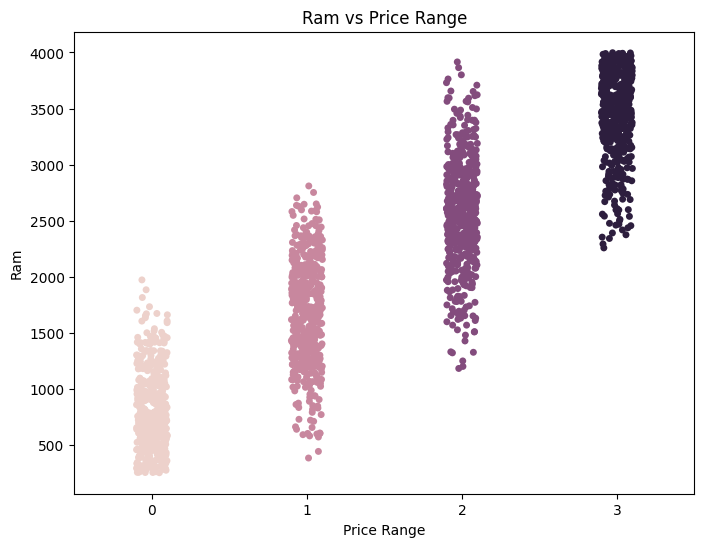

In [25]:
# Chart - 5 visualization code
# Chart size
plt.figure(figsize=(8,6))
# Stripplot
sns.stripplot(data = mobile_df, x = 'price_range', y = 'ram', hue = 'price_range', legend = False)
# Title
plt.title("Ram vs Price Range")
# Labels
plt.xlabel("Price Range")
plt.ylabel("Ram")

plt.show()

##### 1. Why did you pick the specific chart?


Strip plots offer a straightforward and intuitive method for visualizing the distribution of data among various groups. Each data point is depicted by a small dot positioned along the axis that corresponds to the measured variable. These plots are valuable tools for recognizing patterns, outliers, and the general data distribution within each category or group.

##### 2. What is/are the insight(s) found from the chart?

From the above plot we can see that there is a slight increase in price range as RAM increases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

A direct correlation exists between RAM and price range, suggesting that higher RAM typically corresponds to higher prices. Leveraging this insight, businesses can adapt their pricing strategies to target specific market segments more effectively.

#### Chart - 6
### Relation between Front camera and Primary camera with price range.

Correlation between Front camera, Primary camera and Price Range:
                   fc        pc  price_range
fc           1.000000  0.644595     0.021998
pc           0.644595  1.000000     0.033599
price_range  0.021998  0.033599     1.000000


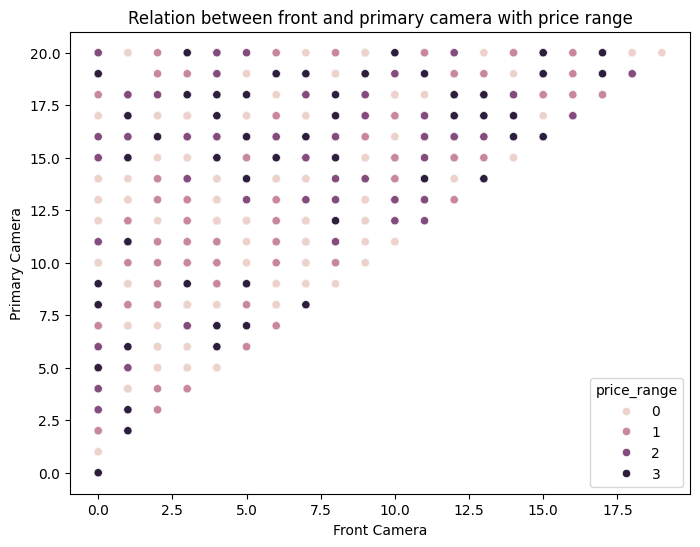

In [26]:
# Chart - 6 visualization code

# Correlation between Front camera, Primary camera and price range
camera_corr= mobile_df[['fc', 'pc', 'price_range']].corr()
print('Correlation between Front camera, Primary camera and Price Range:')
print(camera_corr)

# Chart size
plt.figure(figsize=(8, 6))
# Scatter plot
sns.scatterplot(data=mobile_df, x='fc', y='pc', hue='price_range')
# Labels and title
plt.xlabel('Front Camera')
plt.ylabel('Primary Camera')
plt.title('Relation between front and primary camera with price range')
plt.show()


##### 1. Why did you pick the specific chart?

Scatter plot is a type of graph that uses dots to represent values for two different numeric variables. It is useful for showing the relationship between the variables, such as whether they are correlated, how strong the correlation is, and what kind of pattern or trend they follow.

##### 2. What is/are the insight(s) found from the chart?



*   There is a positive correlation of approximately 0.64 between front camera and primary camera.
*   The correlation between front camera with price range is very weak (approximately 0.022).
* The correlation between primary camera with price range is also very weak (approximately 0.034)



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The correlation analysis suggests that there is no significant relationship between front camera, primary camera and the price range of mobile phones. Therefore, the obtained insights may not directly contribute to creating a positive business impact.

#### Chart - 7
### Exploring the Relationship Between Talk Time and Price range

   price_range  talk_time
0            0     10.612
1            1     11.362
2            2     10.972
3            3     11.098


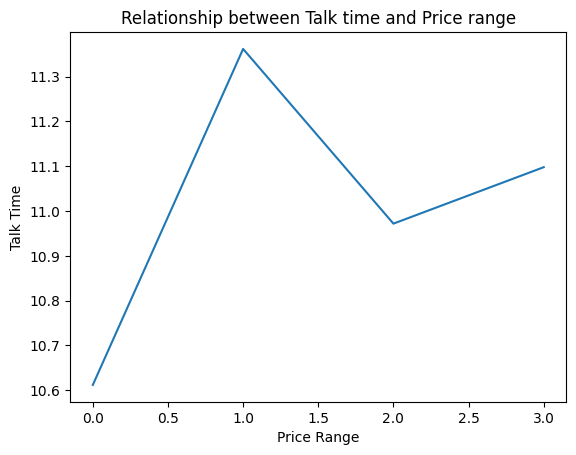

In [27]:
# Chart - 7 visualization code
talk_time = mobile_df.groupby('price_range')['talk_time'].mean().reset_index()
print(talk_time)

plt.plot(talk_time['price_range'], talk_time['talk_time'])
plt.title("Relationship between Talk time and Price range")
plt.xlabel("Price Range")
plt.ylabel("Talk Time")
plt.show()

##### 1. Why did you pick the specific chart?

Line charts are effective for showing how data points are connected and how they change over time. Line charts use lines to connect data points, making it easy to see the overall direction of the data.

##### 2. What is/are the insight(s) found from the chart?

This chart depicts a modest correlation between talk time and price range. As the price range rises, talk time initially increases, then declines, and finally shows a slight increase once more.

#### Chart - 8
### Comparision between Battery Power with 3G & 4G Netweork

   three_g  four_g  Count
1        1       1   1043
2        1       0    480
0        0       0    477


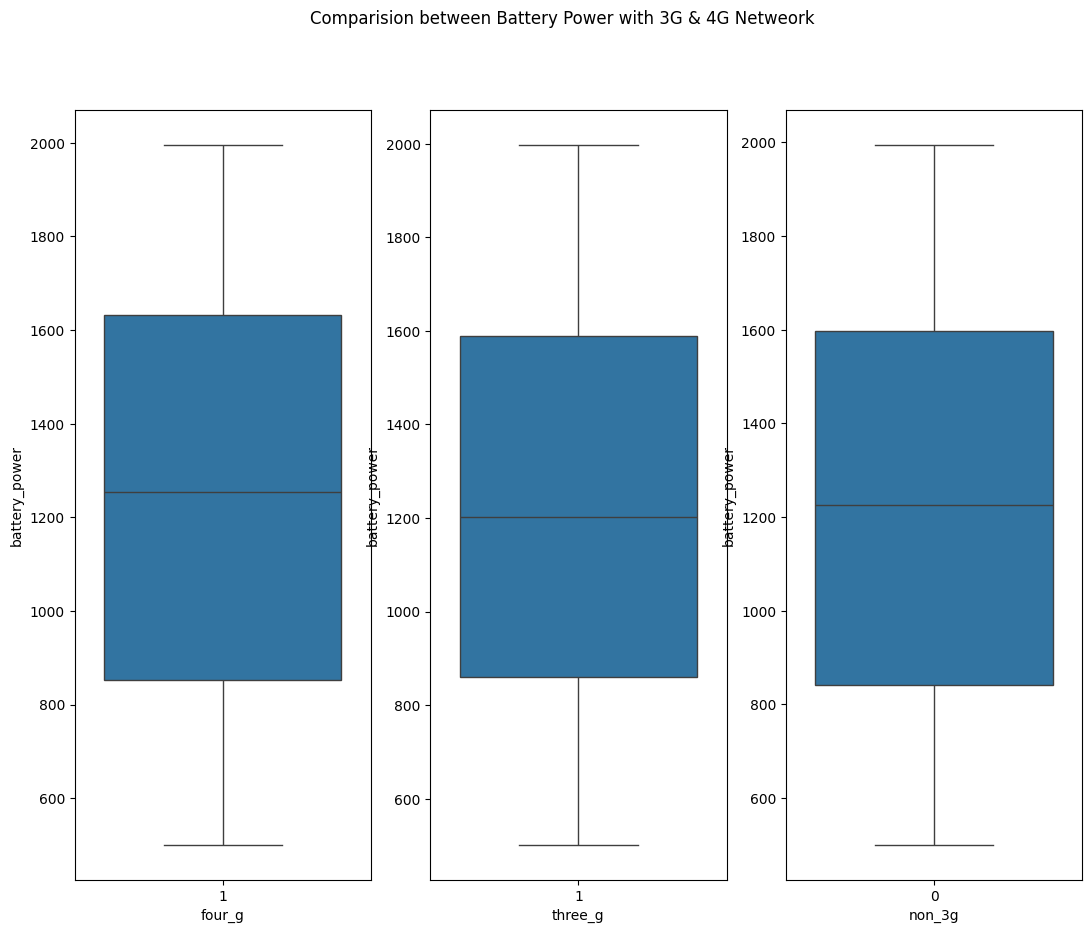

In [28]:
# Chart - 8 visualization code
# 3G and 4G network count
print(mobile_df.groupby('three_g')['four_g'].value_counts().reset_index(name='Count').sort_values(['Count'], ascending=False))

# mobile which support 4G and 3G
four_g_df = mobile_df[mobile_df['four_g'] == 1][['four_g','battery_power']]

# mobile which support only 3G
condition = (mobile_df['three_g'] == 1) & (mobile_df['four_g'] == 0)
three_g_df = mobile_df.loc[condition, ['three_g', 'battery_power']]

# mobile which does not support 3G and 4G
non_g_df =mobile_df[mobile_df['three_g'] == 0][['three_g', 'battery_power']]
non_g_df.rename(columns={'three_g': 'non_3g'}, inplace=True)

# mobile which doesn't support 3G or 4G
non_3g_mobiles =mobile_df[mobile_df['three_g'] == 0][['three_g', 'battery_power']]
non_3g_mobiles.rename(columns={'three_g': 'non_3g'}, inplace=True)

# visualizing boxplot chart
plt.figure(figsize=(13, 10))

plt.subplot(1, 3, 1)                                                         # First subplot for 4G mobiles
sns.boxplot(x="four_g", y="battery_power", data=four_g_df)

plt.subplot(1, 3, 2)                                                         # Second subplot for 3G only mobiles
sns.boxplot(x="three_g", y="battery_power", data=three_g_df)

plt.subplot(1, 3, 3)                                                         # Third subplot for Non-3G mobiles
sns.boxplot(x="non_3g", y="battery_power", data=non_g_df)

plt.suptitle("Comparision between Battery Power with 3G & 4G Netweork")  # Chart title
plt.show()

##### 1. Why did you pick the specific chart?

Comparing the distribution of a variable across different categories or groups (like comparing battery power for different network technologies), box plots allow you to do this efficiently by showing the distributions side by side.

##### 2. What is/are the insight(s) found from the chart?

 This chart shows that the spread of battery power within each network type is almost equal.

#### Chart - 9
### Categorical Data Exploration

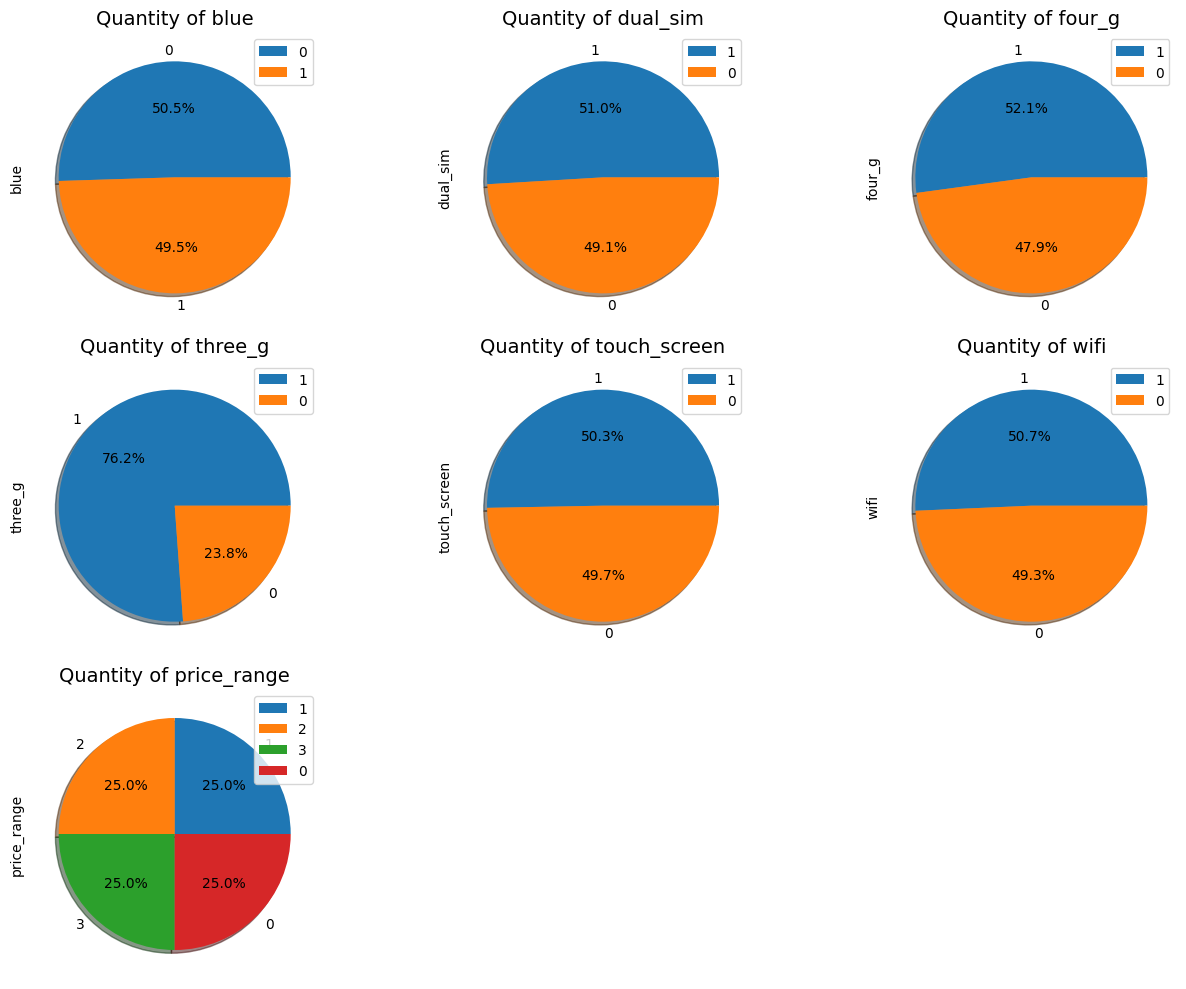

In [29]:
# Chart - 9 visualization code
count = 1
for var in categorical_column:
    plt.subplot(3, 3, count)
    mobile_df[var].value_counts().plot.pie(autopct='%1.1f%%', figsize=(13, 10),shadow=True, legend=True)
    plt.title(f'Quantity of {var}', fontsize=14)
    count += 1

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart is a graphical representation that displays data in a circular-shaped graph. It works best with a few variables. Pie charts are often used with data points belonging to a combination of different categories. Each of these categories is represented as a slice, and the size of each slice is directly proportional to the number of data points that belong to a particular category.

##### 2. What is/are the insight(s) found from the chart?

By above observation we get to know that features above have almost equal weightage of percentage except 3G. 76% mobile supports 3G because every phone that support 4G also support 3G network. Touchscreen and keypad both phones have almost equal craze. All 4 price range have equals ratio of 25%.

#### Chart - 14 - Correlation Heatmap

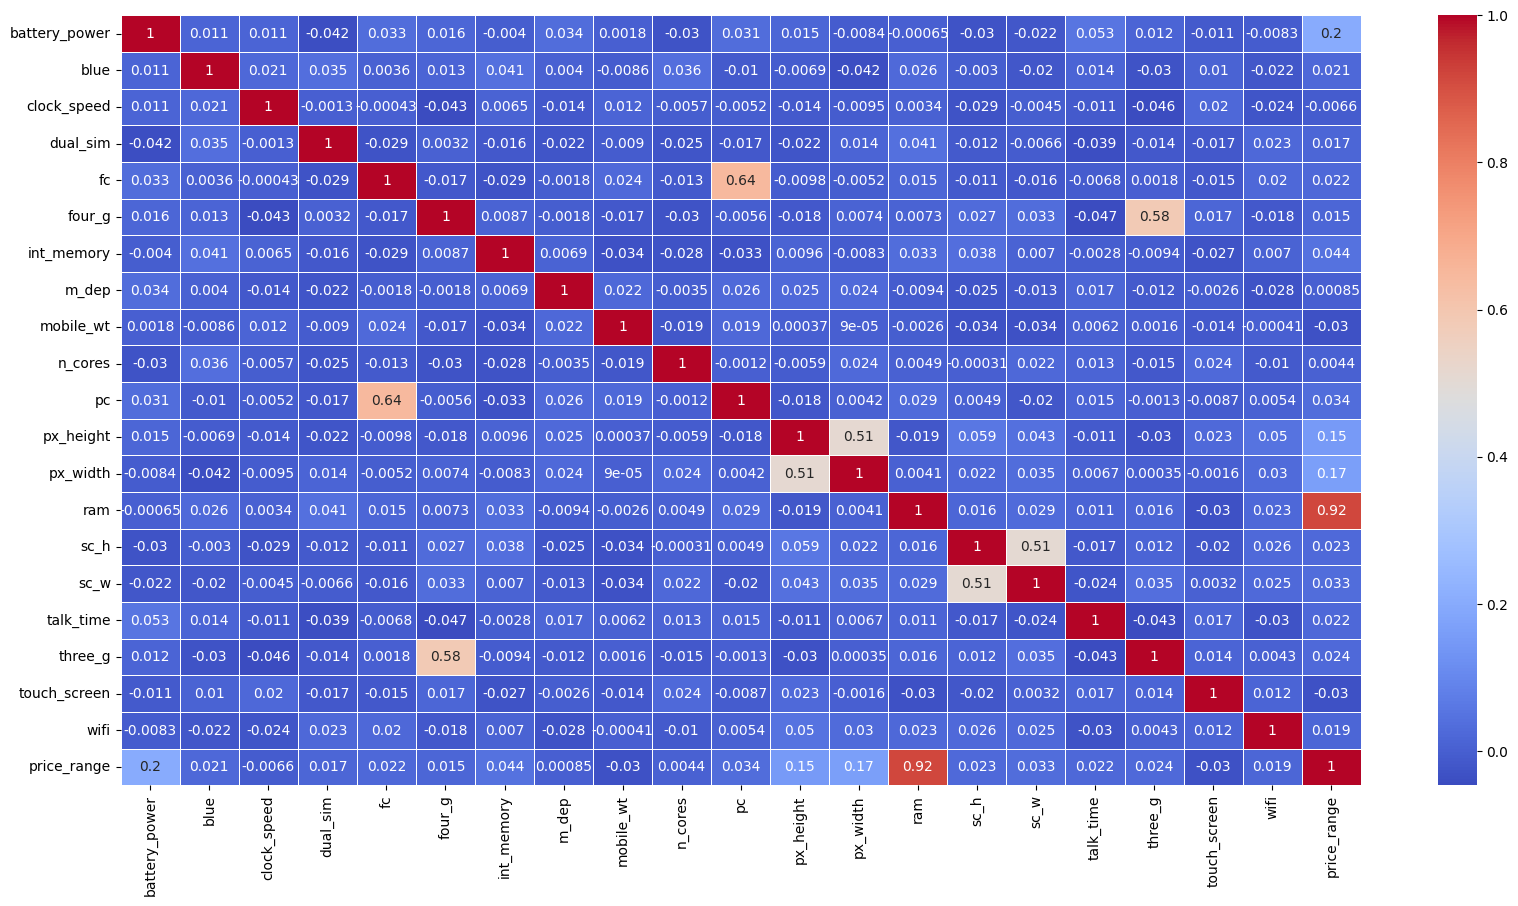

In [30]:
# Correlation Heatmap visualization code
corr_df = mobile_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_df, annot = True, cmap = 'coolwarm', linewidth = .5)
plt.show()

##### 1. Why did you pick the specific chart?

We use correlation heatmap to check for correlation among the features visually. Each cell in the heatmap represents the correlation between two variables.In our case if two variable are positive correlation it shows dark orange color and dark blue color shows negative correlation.

##### 2. What is/are the insight(s) found from the chart?



*   The correlation between price range and ram is high.
*   There are collinearity in data like ('pc' & 'fc'),('px_height' & 'px_width') and ('sc_h' & 'sc_w').
* There is also a correlation between 'four_g' and 'three_g' because all 'four_g' mobile phones have 'three_g' network capability.



#### Chart - 15 - Pair Plot

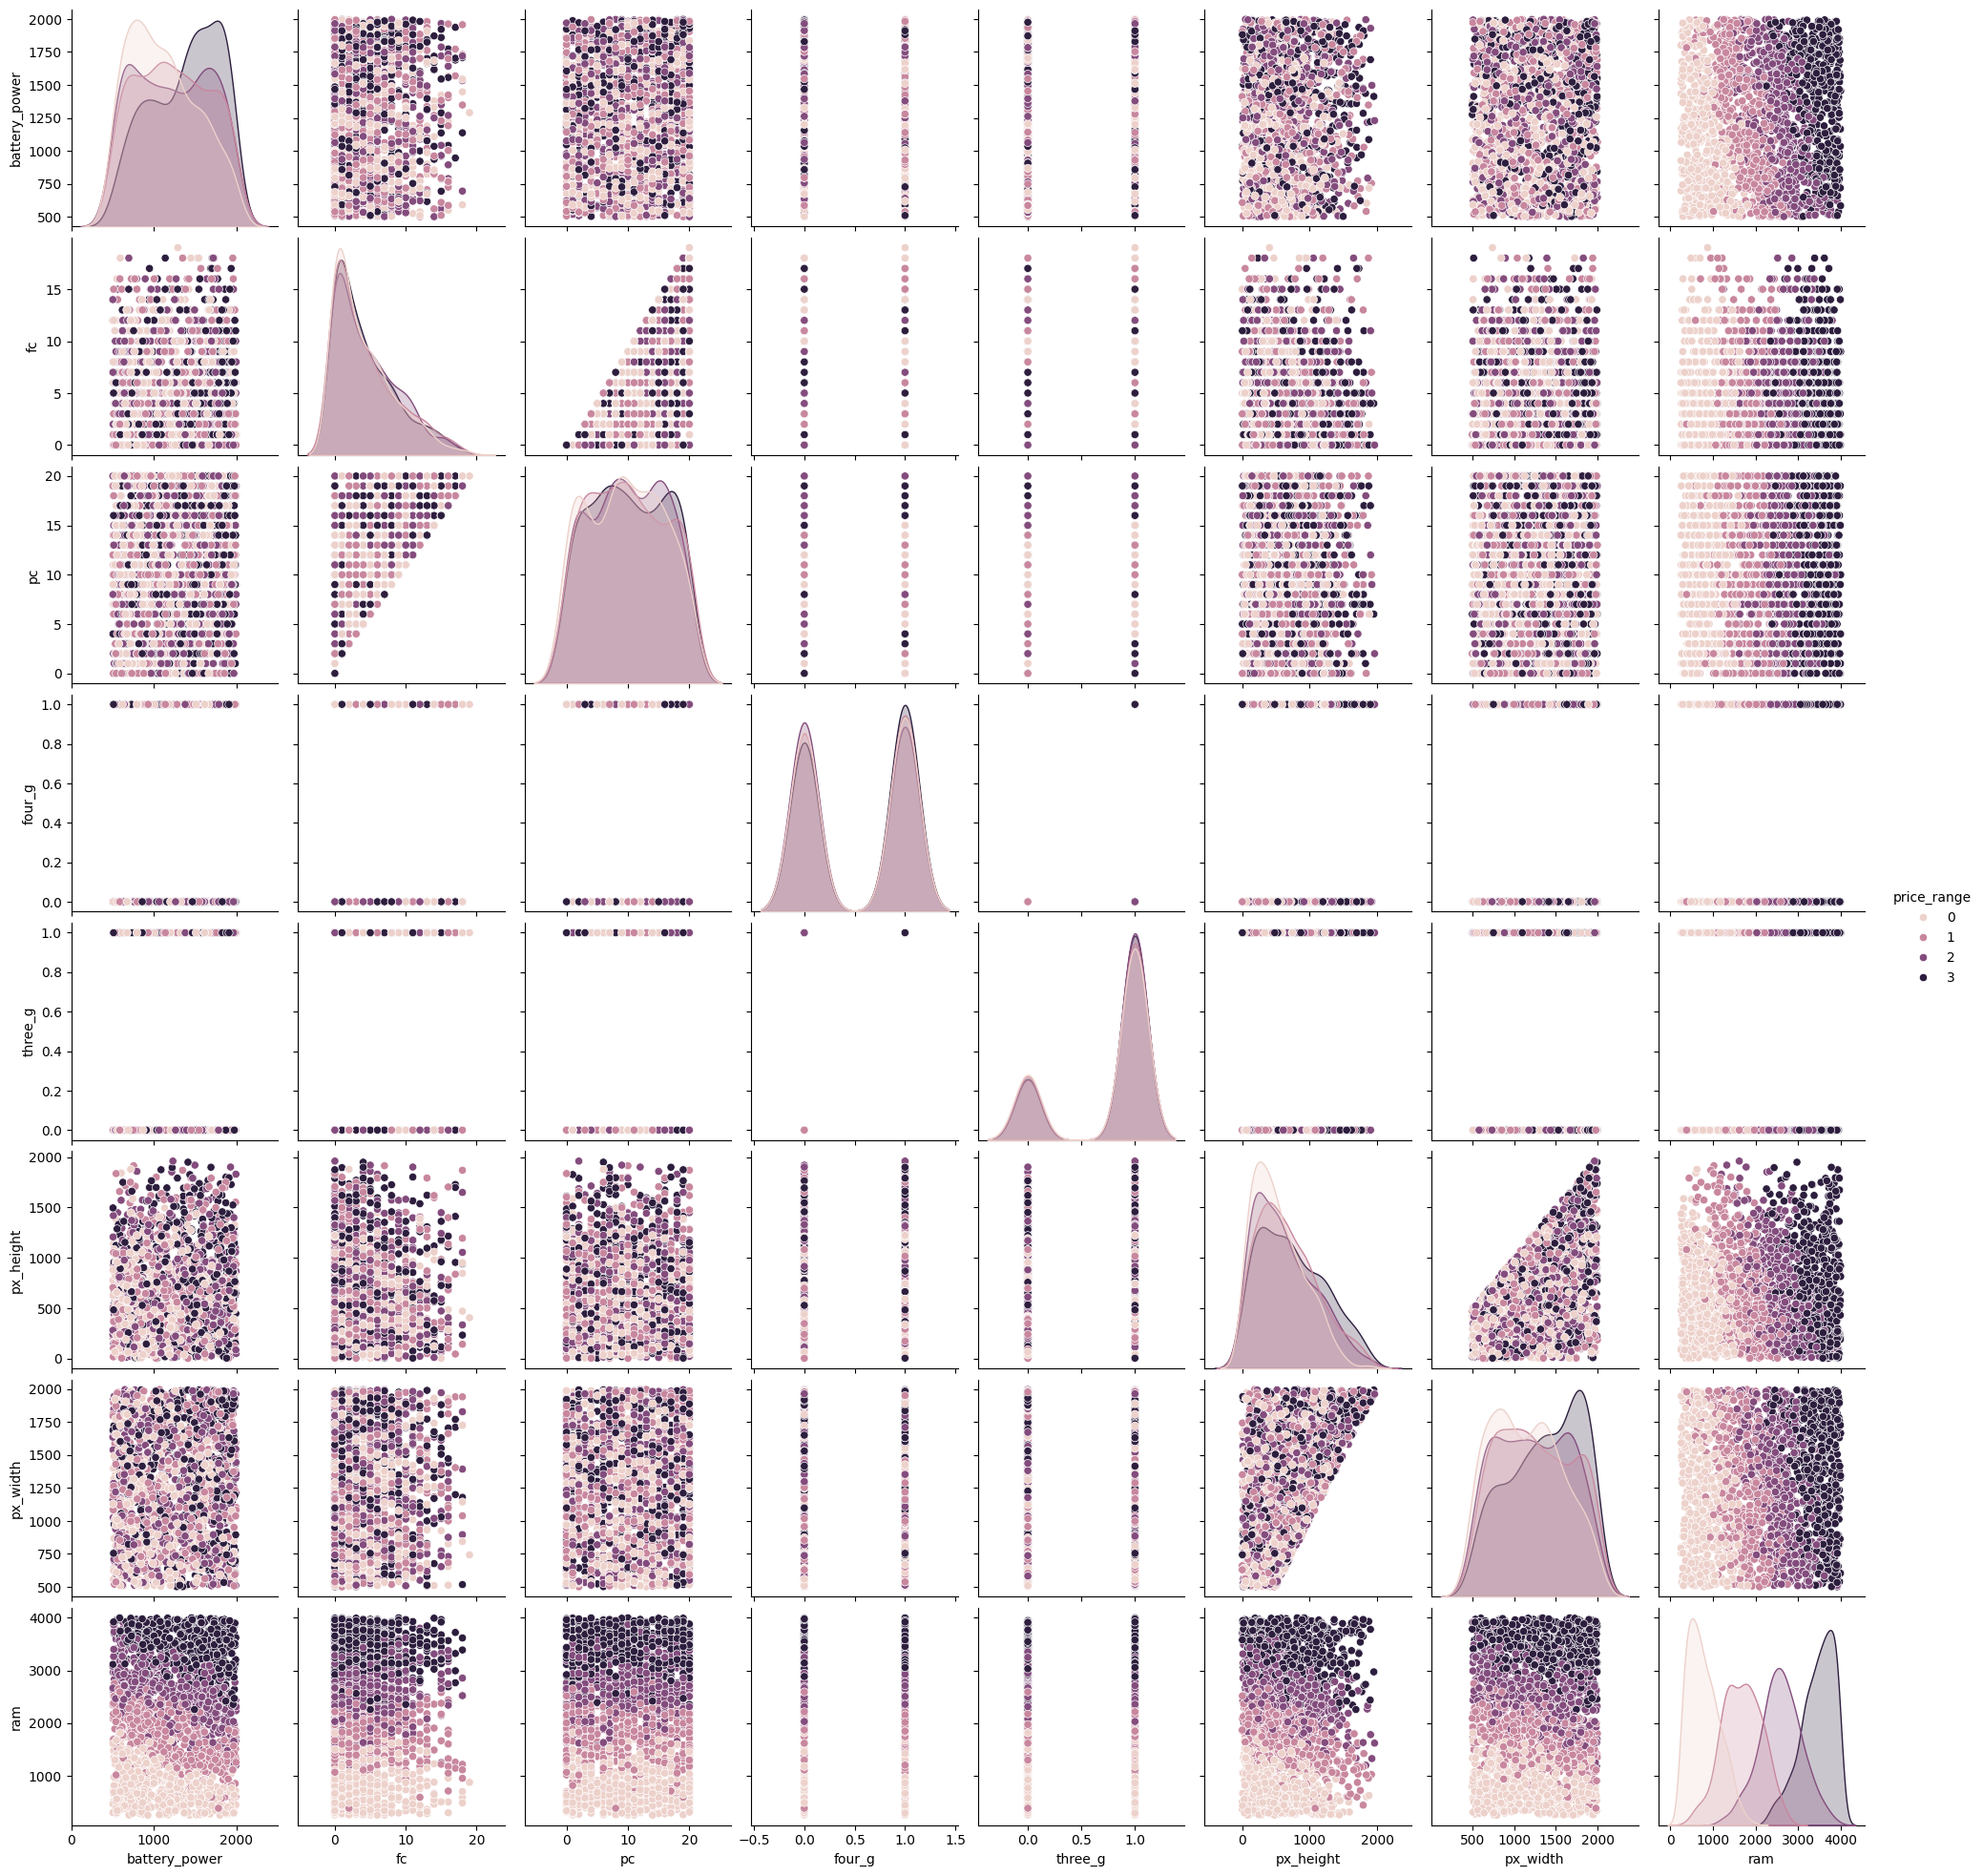

In [31]:
# Pair Plot visualization code
# columns for pair plot
columns = ['battery_power', 'fc', 'pc', 'four_g', 'three_g', 'px_height', 'px_width', 'ram', 'price_range']

# Dataframe of selected columns
pair_df = mobile_df[columns]

# Pair plot
sns.pairplot(pair_df, hue = 'price_range')

##### 1. Why did you pick the specific chart?

Pairplot use to plot pairwise relationships between variables within a dataset.

##### 2. What is/are the insight(s) found from the chart?



*   High price range mobile have high ram capacity.
*   There is no clear relation between battery power with ram.
*   Pixel height increases as the pixel width is increases.



## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant relanation betweee 4G and price range.

Alernative Hypothesis(H1): There is significant relanation between 4G and price range.

#### 2. Perform an appropriate statistical test.

In [34]:
# Perform Statistical Test to obtain P-Value
# contingency table
contingency_table = pd.crosstab(mobile_df['four_g'], mobile_df['price_range'])
print('contingency table: \n',contingency_table)

# calculate the chi-squared statistic and p value
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# printing the result
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:")
print(expected)

# Interpret the result
alpha = 0.05
if p<alpha:
  print("Reject the Null Hypothesis i.e. There is significant relation between 4G and price range.")
else:
  print("Fail to Reject the Null Hypothesis i.e. There is no significant relation between 4G and price range.")

contingency table: 
 price_range    0    1    2    3
four_g                         
0            241  238  253  225
1            259  262  247  275
Chi-square statistic: 3.179879597375548
p-value: 0.36471408196943356
Degrees of freedom: 3
Expected values:
[[239.25 239.25 239.25 239.25]
 [260.75 260.75 260.75 260.75]]
Fail to Reject the Null Hypothesis i.e. There is no significant relation between 4G and price range.


##### Which statistical test have you done to obtain P-Value?

I have used chi-squared test to obtain P-Value.

##### Why did you choose the specific statistical test?

The Chi2 test is a hypothesis test that is used when you want to determine if there is a relationship between two categorical variable.

From the Chi Squared test we obtain the P value is 0.364 which is greter than our significance level (0.05). Therefore we can say that 4G network does not have any relation with price range.



### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in mobile battery power across different price ranges.

Alternative Hypothesis (Ha): There is a significant difference in mobile battery power across different price ranges.

#### 2. Perform an appropriate statistical test.

In [35]:
# Perform Statistical Test to obtain P-Value
# separate the data into groups
group_1 = mobile_df['battery_power'][mobile_df['price_range']==0]
group_2 = mobile_df['battery_power'][mobile_df['price_range']==1]
group_3 = mobile_df['battery_power'][mobile_df['price_range']==2]
group_4 = mobile_df['battery_power'][mobile_df['price_range']==3]

# perform annova test
f_statistic, p_value = stats.f_oneway(group_1, group_2, group_3, group_4)

# print the result
print(f"f_statistic: {f_statistic}")
print(f"P-Value: {p_value}")

# Interpret the Result
alpha = 0.05
if p_value < alpha:
  print("Reject the Null Hypothesis i.e. There is a significant difference in mobile battery power across different price ranges.")
else:
  print("Fail to Reject the Null Hypothesis i.e There is no significant difference in mobile battery power across different price ranges.")


f_statistic: 31.598157539897333
P-Value: 5.948688277085545e-20
Reject the Null Hypothesis i.e. There is a significant difference in mobile battery power across different price ranges.


##### Which statistical test have you done to obtain P-Value?

I have used ANOVA test (Analysis of variance) to obtain P-Value.

##### Why did you choose the specific statistical test?

 ANOVA test  is used when we want to compare the means of a condition between more than two groups. we have the multiple price range group.



### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis (H0): Ram and Price Range are independent to each other.

Alternative hypothesis (H1): Ram and Price Range are dependent to  each other.

#### 2. Perform an appropriate statistical test.

In [36]:
# Perform Statistical Test to obtain P-Value
contingency_table = pd.crosstab(mobile_df['ram'], mobile_df['price_range'])
print('contingency table: \n',contingency_table)

# calculate the chi-squared statistic and p value
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# printing the result
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:")
print(expected)

# Interpret the result
alpha = 0.05
if p<alpha:
  print("Reject the Null Hypothesis i.e. Ram and Price Range are dependent to each other.")
else:
  print("Fail to Reject the Null Hypothesis i.e. Ram and Price Range is independent to each other.")


contingency table: 
 price_range  0  1  2  3
ram                    
256          1  0  0  0
258          2  0  0  0
259          1  0  0  0
262          1  0  0  0
263          1  0  0  0
...         .. .. .. ..
3990         0  0  0  1
3991         0  0  0  2
3993         0  0  0  1
3996         0  0  0  1
3998         0  0  0  1

[1562 rows x 4 columns]
Chi-square statistic: 5404.666666666667
p-value: 5.726600585736166e-13
Degrees of freedom: 4683
Expected values:
[[0.25 0.25 0.25 0.25]
 [0.5  0.5  0.5  0.5 ]
 [0.25 0.25 0.25 0.25]
 ...
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]
Reject the Null Hypothesis i.e. Ram and Price Range are dependent to each other.


##### Which statistical test have you done to obtain P-Value?

I use chi-squared test to obtain p-Value.

##### Why did you choose the specific statistical test?

By performing a chi-squared test on the contingency table, we can obtain a p-value. If the p-value is below a chosen significance level (commonly set at 0.05), we can conclude that there is a statistically relation between the two variables. if the p-value is above the significance level it indicates that there is no relation between the variables, and they can be considered independent. In our case p_value is below 0.05 so the Ram and Price range are dependent to each other.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [37]:
# Handling Missing Values & Missing Value Imputation
mobile_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no null values present in our dataset.

### 2. Handling Outliers

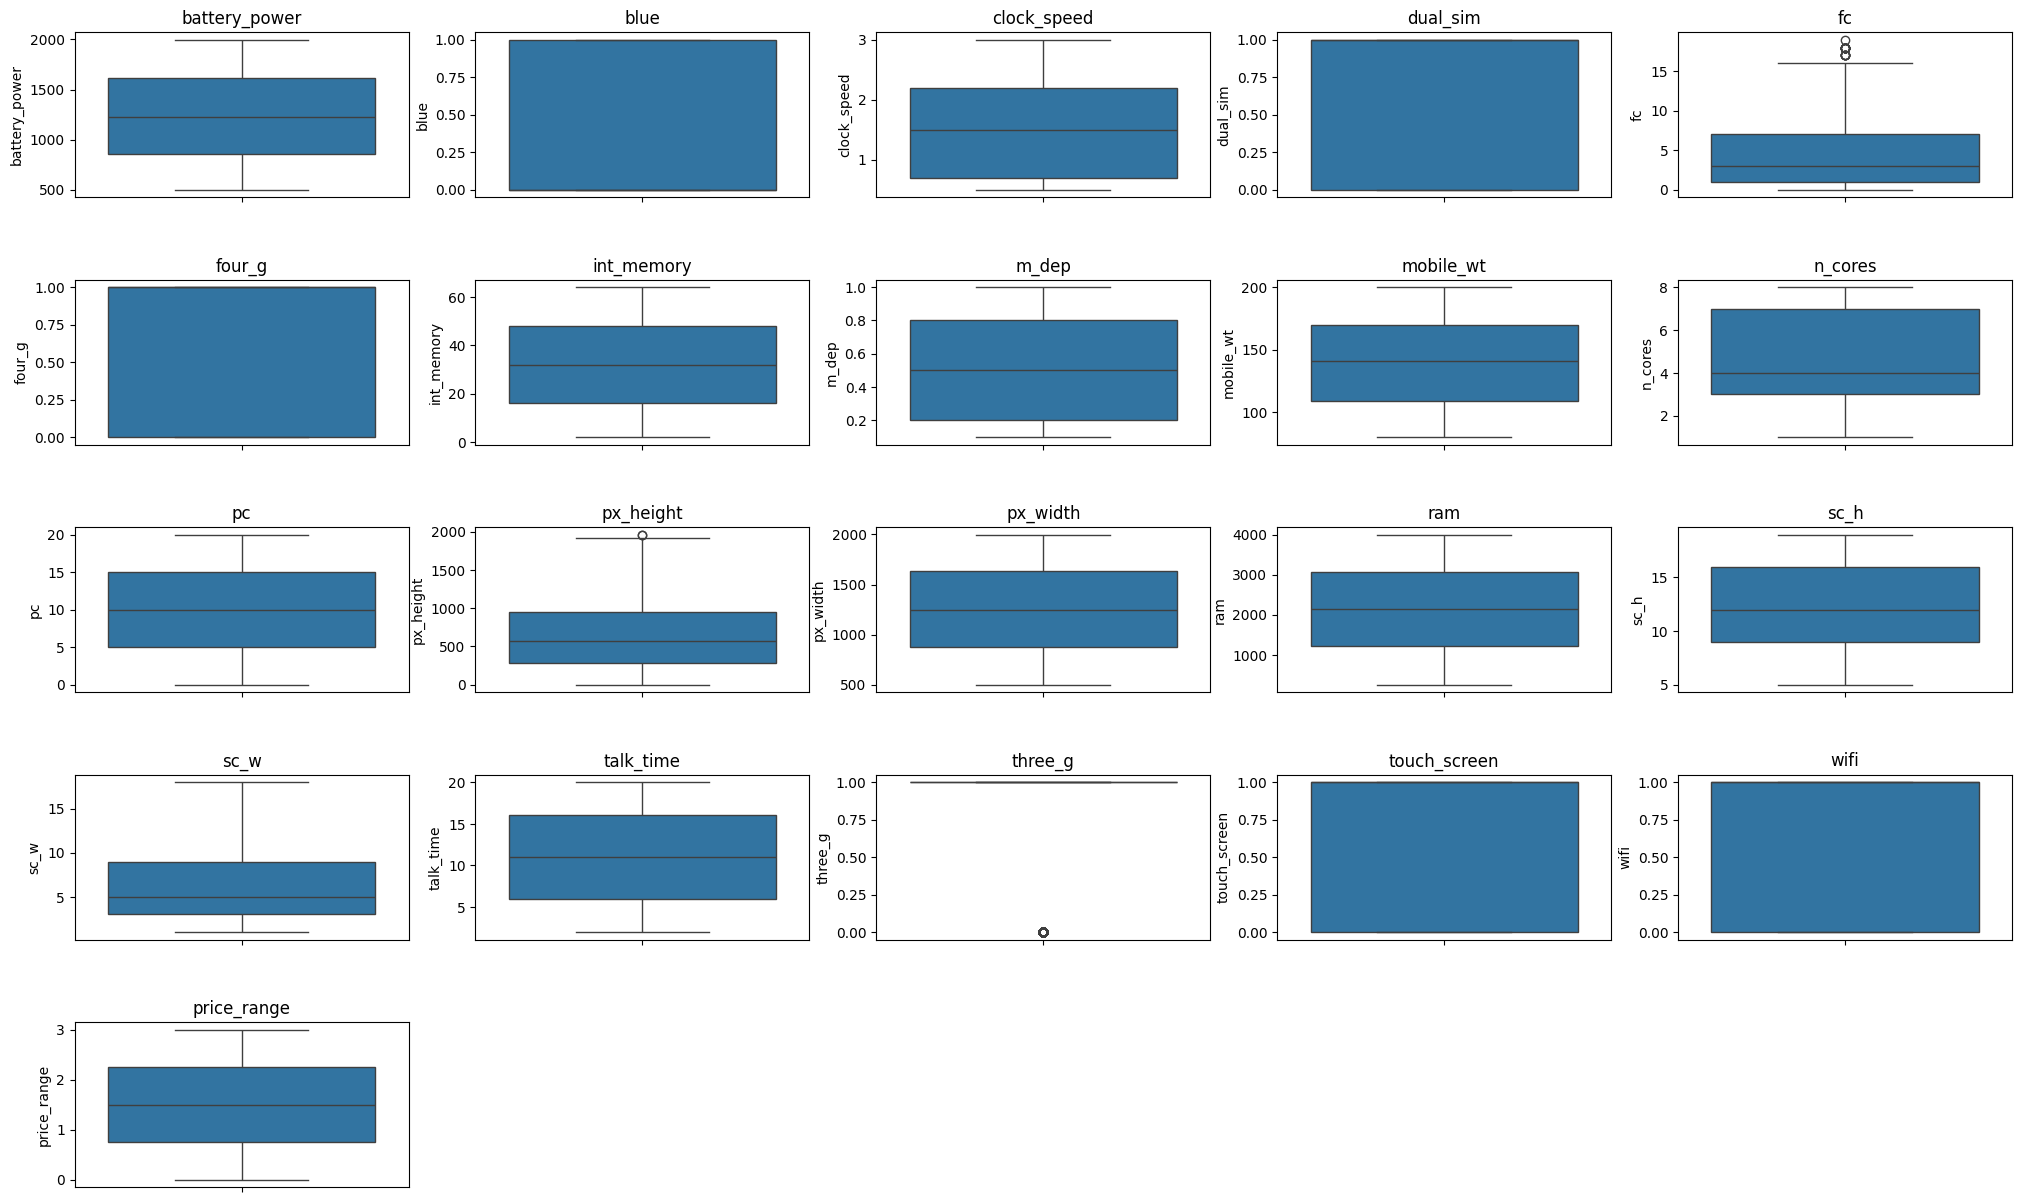

In [38]:
# Handling Outliers & Outlier treatments
# Set the figure size
plt.figure(figsize=(25,15))

# Loop through each column in the DataFrame's describe() method
for index, feature in enumerate([i for i in mobile_df.describe().columns.to_list()] ):

  # Create a subplot in a 5x5 grid, starting with the first subplot (index 0)
  plt.subplot(5,5,index+1)

  # Create a box plot of the current column's data
  sns.boxplot(mobile_df[feature])

  # Add the column name to the subplot title
  plt.title(feature)

  # Add some spacing between the subplots
  plt.subplots_adjust(hspace=0.5)

# Add a newline for clarity
print("\n")

##### What all outlier treatment techniques have you used and why did you use those techniques?

There aren't many outliers present.

### 3. Categorical Encoding

In [39]:
# Encode your categorical columns
mobile_df.dtypes


battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

#### What all categorical encoding techniques have you used & why did you use those techniques?

Categorical encoding in machine learning refers to the process of converting categorical variables into a numerical format that can be used for machine learning algorithms.

In our case categorical encoding not necessary because all values are present in integer or float.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

## There are no text column in the dataset.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [40]:
# Manipulate Features to minimize feature correlation and create new features
# copying our dataset
new_df = mobile_df.copy()

# Creating new column Pixels
new_df['pixels'] = new_df['px_height'] * new_df['px_width']

# Creating new column sc_size
new_df['sc_size'] = round(np.sqrt(new_df['sc_h']**2 + new_df['sc_w']**2)/2.54,2) # divided by 2.54 that convert cm to inch

# Dropint the column px_height, px_width, sc_h and sc_w
new_df.drop(columns=['px_height','px_width','sc_h','sc_w'], axis = 1, inplace = True)


#### 2. Feature Selection

In [41]:
# Select your features wisely to avoid overfitting
new_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'talk_time',
       'three_g', 'touch_screen', 'wifi', 'price_range', 'pixels', 'sc_size'],
      dtype='object')

##### What all feature selection methods have you used  and why?




I have added a new column named "pixels," which represents the product of the "px_height" and "px_width" columns. Additionally, I have created another new column called "sc_size," which denotes the screen size in inches.



##### Which all features you found important and why?

screen size and screen resolution is important feature for the customer.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [42]:
# Transform Your data

# Defining Independent and dependent variable
x = new_df.drop(['price_range'], axis = 1)  # Independent Variable
y = new_df['price_range']         # Dependent Variable

### 6. Data Scaling

In [43]:
# Scaling your data
scale = MinMaxScaler()
x_scaled = scale.fit_transform(x)


##### Which method have you used to scale you data and why?

MinMax Scaler shrinks the data within the given range, usually of 0 to 1. It transforms data by scaling features to a given range. It scales the values to a specific value range without changing the shape of the original distribution.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

###Dimensionality Reduction not required in this dataset.

### 8. Data Splitting

In [45]:
# Split your data to train and test. Choose Splitting ratio wisely.
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 42)
print('Train dataset shape: ',x_train.shape)
print("Test dataset shape: ",x_test.shape)

Train dataset shape:  (1600, 18)
Test dataset shape:  (400, 18)


##### What data splitting ratio have you used and why?

I have used data splitting ration 80:20 for training and testing i.e 80% of the data will be used for training the model, and 20% of the data will be used for testing the model's performance.

The random_state parameter is set to 42, which is an arbitrary number used to ensure that the data is split in a reproducible way.

### 9. Handling Imbalanced Dataset

In [46]:
# Handling Imbalanced Dataset (If needed)
new_df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

##### Do you think the dataset is imbalanced? Explain Why.

Our dataset is balanced.

## ***7. ML Model Implementation***

### ML Model - 1: Logistic Regression

In [47]:
# ML Model - 1 Implementation
lr = LogisticRegression()
# Fit the Algorithm
lr.fit(x_train, y_train)
# Predict
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

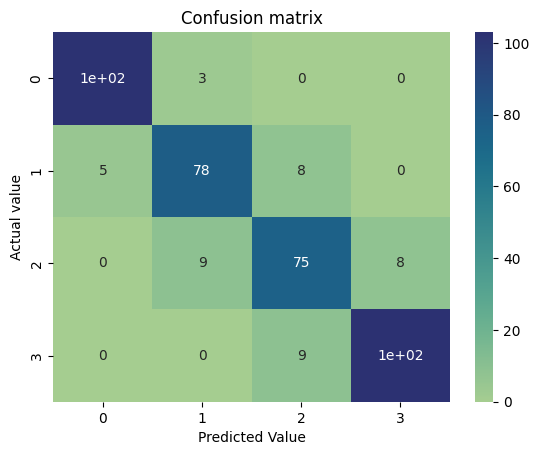

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       107
           1       0.86      0.87      0.86        90
           2       0.82      0.82      0.82        92
           3       0.92      0.93      0.92       111

    accuracy                           0.90       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.90      0.90       400



In [48]:
# Visualizing evaluation Metric Score chart
# confusion matrix
lr_clf = confusion_matrix(y_test, y_test_pred)
# Heatmap of confusion matrix
ax = sns.heatmap(lr_clf, annot = True, cmap = 'crest')
ax.set_title("Confusion matrix")
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual value")
#Ticket label
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])
# Display the Graph
plt.show()

# classification report on Test data
print(classification_report(y_test_pred, y_test ))

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The ML model used is Logistic Regression and The classification report shows the precision,recall, f1-score, accuracy, macro avg, weighted avg as well as support(number of instances) of each price range class.

#####Precision: When the model predicts the positives, how often is it right.

####Recall: When it's actually True, how often does it predict True.

####F1-score: It is the Harmonic mean of Precision and Recall.

####Accuracy: The number of predictions that the model got right.

####Macro avg: It is the mean average of precision/recall/F1 of all classes.

####Weighted avg: It is the total number TP(true positive of all classes)/total number of objects in all classes.

Looking at the evaluation metric scores, we can see that the model has an overall accuracy of 90%, meaning that it correctly classified 90% of the instances in the testing set. The precision for class 0 is 97%, meaning that when the model predicted a class 0 instance, it was correct 97% of the time. The recall for class 0 is 95%, meaning that the model correctly identified 95% of the actual class 0 instances in the dataset. The F1-score for class 0 is 96%.
Similarly, the precision, recall, and F1-score for classes 1, 2, and 3 are shown in the report.

#### 2. Cross- Validation & Hyperparameter Tuning

In [49]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lr = LogisticRegression(max_iter=1000)
param_grid = {'C':[0.001,0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(lr, param_grid, cv=5)
# Fit the Algorithm
grid.fit(x_train, y_train)

print(f"Best Cross validation score: {grid.best_score_}")
print(f"Best parameter: {grid.best_params_}")
print(f"Test Score: {grid.score(x_test,y_test)}")

Best Cross validation score: 0.929375
Best parameter: {'C': 100}
Test Score: 0.925


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is a commonly used technique for hyperparameter tuning that involves searching over a predefined grid of hyperparameters and selecting the combination that gives the best performance on a validation set.

In this case, the grid of hyperparameters included different values of C, which controls the regularization strength of the logistic regression model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The best cross-validation score achieved was 0.929, and the best hyperparameter value for C was found to be 100.

After training the model with the best hyperparameters, the test set score was found to be 0.925. This suggests that the model is performing consistently well on test dataset.

### ML Model - 2: XGBOOST

In [50]:
# ML Model - 2 Implementation
xgb = XGBClassifier(max_depth = 5, learning_rate = 0.1)
xgb.fit(x_train, y_train)
XGBClassifier(max_depth=5, objective='multi:softprob')

# Prediction
y_pred_train = xgb.predict(x_train)
y_pred_test = xgb.predict(x_test)

# Evaluation metrics for Test set
score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Test set)= ')
print(score)


Classification Report for XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       105
           1       0.83      0.88      0.86        91
           2       0.81      0.84      0.82        92
           3       0.94      0.89      0.92       112

    accuracy                           0.89       400
   macro avg       0.88      0.89      0.88       400
weighted avg       0.89      0.89      0.89       400



[[ 98   7   0   0]
 [  5  80   6   0]
 [  0   9  77   6]
 [  0   0  12 100]]


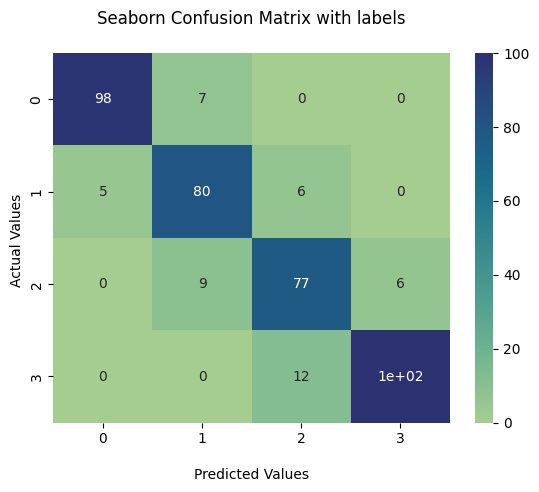

In [51]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)
print(cf_matrix)

# visualization of the Confusion Matrix.
ax = sns.heatmap(cf_matrix, annot=True, cmap='crest')
ax.set_title('Seaborn Confusion Matrix with labels\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

plt.show()

In [52]:
# Evaluation metrics for Training Set
score = classification_report(y_train, y_pred_train)
print('Classification Report for XGBoost(Train set)= ')
print(score)


Classification Report for XGBoost(Train set)= 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       409
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       388

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The XGBoost model on the training set achieved a very high accuracy score of 1.00. The precision, recall, and F1-score for each class are also very high score of 1.00. which indicates that the model is performing very well on the training set.

#### 2. Cross- Validation & Hyperparameter Tuning

In [53]:

# Define the XGBoost classifier
xgb = XGBClassifier()

# Define the hyperparameter search space
params = {
    'learning_rate': [0.01,0.2,0.5,0.8,1],
    'n_estimators': [50,100, 500, 1000],
}

# Perform cross-validation and hyperparameter tuning
grid_search = GridSearchCV(xgb, params, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and CV score
print("Best hyperparameters:", grid_search.best_params_)
print("Cross-validation score:", grid_search.best_score_)

# Evaluate the tuned model on the test set
y_pred_test = grid_search.predict(x_test)
score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Test set)= ')
print(score)

Best hyperparameters: {'learning_rate': 0.2, 'n_estimators': 50}
Cross-validation score: 0.903125
Classification Report for XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       105
           1       0.84      0.90      0.87        91
           2       0.83      0.84      0.83        92
           3       0.94      0.89      0.92       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



In [54]:
# Evaluation metrics for train
score = classification_report(y_train, y_pred_train)
print('Classification Report for tuned XGBoost(Train set)= ')
print(score)

Classification Report for tuned XGBoost(Train set)= 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       409
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       388

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV hyperparameter optimization technique. GridSearchCV is a commonly used technique for hyperparameter tuning. It performs an exhaustive search over specified hyperparameter values for an estimator, and evaluates each combination using cross-validation. GridSearchCV helps to automate the process of parameter tuning, and helps to find the best combination of hyperparameters for the model, which in turn can improve its performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

 There are no any  improvement in the performance of the XGBoost model after hyperparameter tuning and cross-validation.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Precision: it measures how accurate the positive predictions are. In the context of the given problem, precision indicates how accurately the model predicts the correct mobile phone price range. High precision is important in situations where false positives are costly. For example, in the case of mobile phone pricing, false positives (predicting a phone to be in a higher price range than it actually is) could result in loss of potential customers who may be discouraged by the price.

Recall: It is the ratio of true positive predictions to the total number of actual positive instances in the dataset. It measures how well the model is able to identify all positive instances. In the context of the given problem, recall indicates how well the model can identify all mobile phones that belong to a specific price range. High recall is important when false negatives are costly. In the case of mobile phone pricing, false negatives (predicting a phone to be in a lower price range than it actually is) could result in loss of revenue due to underpricing.

### ML Model - 3 SVM

In [55]:
# ML Model - 3 Implementation
svm = SVC()
# Fit the Algorithm
svm.fit(x_train, y_train)
# Predict on the model
y_train_pred = svm.predict(x_train)
y_test_pred = svm.predict(x_test)

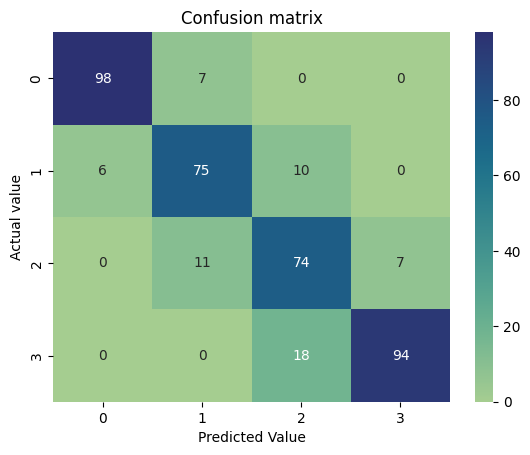

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       104
           1       0.82      0.81      0.82        93
           2       0.80      0.73      0.76       102
           3       0.84      0.93      0.88       101

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



In [56]:
# Visualizing evaluation Metric Score chart
# confusion matrix
svm= confusion_matrix(y_test, y_test_pred)
# Heatmap of confusion matrix
ax = sns.heatmap(svm, annot = True, cmap = 'crest')
ax.set_title("Confusion matrix")
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual value")
#Ticket label
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])
# Display the Graph
plt.show()

# classification report on Test data
print(classification_report(y_test_pred, y_test ))

#### 2. Cross- Validation & Hyperparameter Tuning

In [57]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
svm = SVC()
param = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'random_state': [0, 1, 42]}
svm_grid = GridSearchCV(estimator = svm,param_grid = param, scoring = 'accuracy', cv = 5)
# Fit the Algorithm
svm_grid.fit(x_train, y_train)
# Get the best parameter and best score
print(f"Best parameter: {svm_grid.best_params_}")
print(f"Best score: {svm_grid.best_score_}")

Best parameter: {'C': 1000, 'gamma': 0.001, 'kernel': 'linear', 'random_state': 0}
Best score: 0.9262499999999999


In [58]:
# Evaluate the tuned model on the test set
y_pred_test = svm_grid.predict(x_test)
score = classification_report(y_test, y_pred_test)
print('Classification Report for svm (Test set)= ')
print(score)

Classification Report for svm (Test set)= 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       105
           1       0.89      0.93      0.91        91
           2       0.89      0.89      0.89        92
           3       0.95      0.94      0.95       112

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV hyperparameter optimization technique. GridSearchCV is a commonly used technique for hyperparameter tuning. It performs an exhaustive search over specified hyperparameter values for an estimator, and evaluates each combination using cross-validation. GridSearchCV helps to automate the process of parameter tuning, and helps to find the best combination of hyperparameters for the model, which in turn can improve its performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there is an improvement in the performance of the svm model after hyperparameter tuning and cross-validation. The cross-validation score increased from 0.85 to 0.93.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Their is different evaluation matrix. The classification report shows precision, recall, and F1-score for each class separately, as well as for the weighted average and the macro average. Therefore, the evaluation metrics that you can consider for a positive business impact are:

####Weighted average of precision, recall, and F1-score: This metric takes into account the class imbalance by weighting the metrics by the number of samples in each class. In the context of mobile price range prediction, the weighted average of precision, recall, and F1-score can help you evaluate the overall performance of the model, taking into account the importance of each class.

####Macro average of precision, recall, and F1-score: This metric calculates the average of precision, recall, and F1-score across all classes, without taking into account the class imbalance. In the context of mobile price range prediction, the macro average of precision, recall, and F1-score can help you evaluate the performance of the model on each class separately and identify which classes are more difficult to predict.

####Confusion matrix: As mentioned before, the confusion matrix can provide valuable insights into which classes are being misclassified.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have choose logistic regression and svm models as final prediction model because they predict better results than xgboost.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Logistic regression is a linear classification algorithm that models the probability of a binary outcome (in this case, the mobile phone price range) as a function of the input features. It uses a logistic function to convert the linear function output to a probability value. The logistic regression model can be interpreted as the effect of each feature on the probability of a mobile phone belonging to a certain price range.


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**



*   From EDA we can see that all 4 price range have equals ratio of mobile phones of 25%.
*   There is a gradual increase in battery as the price range increases.
* Ram has continuous increase with price range while moving from Low cost to Very high cost.
* Costly phones are lighter in weight.
* RAM, battery power, pixels played more significant role in deciding the price range of mobile phone.
* From all the above experiments we can conclude that Logistic Regression performing 92% accuracy. SVM model performing very well on training set with 100% accuracy and test set with 93%.




### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***